## Import Data from API

In [1]:
#pip install psaw

Note: you may need to restart the kernel to use updated packages.


In [268]:
from psaw import PushshiftAPI
api = PushshiftAPI()

In [269]:
import datetime
posted_after = int(datetime.datetime(2017, 11, 30).timestamp())
posted_before = int(datetime.datetime(2022, 11, 20).timestamp()) #Recent 5 years

#Extract submissions
query = api.search_submissions(subreddit='Sustainability', after=posted_after, before=posted_before, limit=100000)

In [270]:
submissions = list()
for element in query:
    submissions.append(element.d_)
print(len(submissions))

/home/qinren/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/home/qinren/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/home/qinren/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


16643


In [271]:
import pandas as pd
submission_df = pd.DataFrame(submissions)

In [272]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16643 entries, 0 to 16642
Data columns (total 90 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  14908 non-null  object 
 1   allow_live_comments            14510 non-null  object 
 2   author                         16643 non-null  object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          16399 non-null  object 
 5   author_flair_text              0 non-null      object 
 6   author_flair_type              16399 non-null  object 
 7   author_fullname                15795 non-null  object 
 8   author_is_blocked              6172 non-null   object 
 9   author_patreon_flair           15670 non-null  object 
 10  author_premium                 13289 non-null  object 
 11  awarders                       13986 non-null  object 
 12  can_mod_post                   16643 non-null 

In [276]:
submission_df = submission_df.loc[:, ['id', 'author', 'over_18','created_utc','domain','url','title',
    'score', 'selftext', 'num_comments', 'num_crossposts']]

In [277]:
submission_df.head()

,id,author,over_18,created_utc,domain,url,title,score,selftext,num_comments,num_crossposts
0,yztbw6,RobertN64,False,1668912848,i.redd.it,https://i.redd.it/tfevg7lqa21a1.jpg,Can someone ELI5 how can Amazon claim this can...,1,,0,0
1,yzmlkm,No-Repeat-90,False,1668893256,self.sustainability,https://www.reddit.com/r/sustainability/commen...,What happens to clothing that gets returned?,1,I got told that some webshops that get clothin...,0,0
2,yzmcdm,Not_l0st,False,1668892581,self.sustainability,https://www.reddit.com/r/sustainability/commen...,most sustainable floor tile type,1,When searching I find a bunch of greenwashing ...,0,0
3,yzlage,DiaMia13,False,1668889746,self.sustainability,https://www.reddit.com/r/sustainability/commen...,What do you think about the constant use of pl...,1,[removed],0,0
4,yzie0v,NearbyEffect999,False,1668882086,self.sustainability,https://www.reddit.com/r/sustainability/commen...,An ecologists take on GDP? Looking for a video...,1,I have been lookin on some criticisms of GDP b...,0,0


In [105]:
submission_df['datetime'] = submission_df['created_utc'].map(lambda t: datetime.datetime.fromtimestamp(t))
submission_df = submission_df.drop('created_utc', axis=1)
submission_df = submission_df.sort_values(by='datetime')

In [106]:
submission_df['datetime'].describe()

/tmp/ipykernel_4112/3231270227.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  submission_df['datetime'].describe()


count                   16643
unique                  16638
top       2021-09-23 20:12:33
freq                        2
first     2017-11-30 03:27:36
last      2022-11-19 21:54:08
Name: datetime, dtype: object

In [68]:
#Sort by number of comments to see the top reddits about 'Sustainable'
df_1 = submission_df.sort_values(by='num_comments')
df_1.tail(10)

,id,author,domain,url,title,score,selftext,num_comments,num_crossposts,full_link,datetime
7373,n9206w,jungle_capital,i.redd.it,https://i.redd.it/ohwpal691ay61.jpg,Lab Grown Meat,1,,229,0,https://www.reddit.com/r/sustainability/commen...,2021-05-10 07:16:17
4645,qgsrg2,Remseey2907,/r/sustainability/comments/qgsrg2/a_busy_morni...,https://v.redd.it/5rg702adpyv71,A busy morning in the Netherlands..,1,,241,0,https://www.reddit.com/r/sustainability/commen...,2021-10-27 05:31:20
8847,lagqrc,bayashad,i.redd.it,https://i.redd.it/l3oqk1gd4ye61.png,"""CO2 emissions from most plant-based products ...",352,,269,1,https://www.reddit.com/r/sustainability/commen...,2021-02-01 17:55:17
8861,l9osrp,yogat3ch,i.redd.it,https://i.redd.it/kodgdfjl3re61.jpg,Simple steps to sustainability,261,,271,1,https://www.reddit.com/r/sustainability/commen...,2021-01-31 18:17:02
8074,mgt5fh,sad_house_guest,self.sustainability,https://www.reddit.com/r/sustainability/commen...,Fact-checking Seaspiracy,1,"Hey folks, \n\nI watched Seaspiracy yesterday,...",300,0,https://www.reddit.com/r/sustainability/commen...,2021-03-30 19:44:16
4776,qbdc5z,FrivolousMagpie,i.redd.it,https://i.redd.it/5qcojnc69fu71.jpg,"Been using a drying rack for a few weeks now, ...",1,,318,0,https://www.reddit.com/r/sustainability/commen...,2021-10-19 11:01:53
7665,my6ojm,bayashad,theguardian.com,https://www.theguardian.com/environment/2018/m...,Scientists found avoiding meat and dairy produ...,1,,326,0,https://www.reddit.com/r/sustainability/commen...,2021-04-25 07:46:28
9968,jvorwe,Tradescollective,self.sustainability,https://www.reddit.com/r/sustainability/commen...,EAT LESS MEAT!,163,There are a lot of ways that we need to clean...,372,0,https://www.reddit.com/r/sustainability/commen...,2020-11-17 02:23:28
8146,mekuj5,starsinsea,self.sustainability,https://www.reddit.com/r/sustainability/commen...,"Seaspiracy and the truth, let’s discuss",1,"Seaspiracy and the truth, let’s discuss.\n\nHe...",469,0,https://www.reddit.com/r/sustainability/commen...,2021-03-27 15:33:15
4165,r4zoga,bayashad,i.redd.it,https://i.redd.it/draf93299k281.jpg,Why does this industry even still exist?,1,,473,0,https://www.reddit.com/r/sustainability/commen...,2021-11-29 11:35:26


In [319]:
#Extract comments
posted_after = int(datetime.datetime(2020, 11, 30).timestamp())
posted_before = int(datetime.datetime(2022, 11, 20).timestamp()) #Recent 5 years
query = api.search_comments(subreddit='Sustainability', after=posted_after, before=posted_before, limit=100000)

In [320]:
comments = list()
for element in query:
    comments.append(element.d_)
print(len(comments))

72928


In [336]:
comments_df = pd.DataFrame(comments)

In [324]:
comments_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72928 entries, 0 to 72927
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   all_awardings                    72928 non-null  object 
 1   archived                         34281 non-null  object 
 2   associated_award                 0 non-null      object 
 3   author                           72928 non-null  object 
 4   author_flair_background_color    2528 non-null   object 
 5   author_flair_css_class           0 non-null      object 
 6   author_flair_template_id         0 non-null      object 
 7   author_flair_text                0 non-null      object 
 8   author_flair_text_color          2528 non-null   object 
 9   body                             72928 non-null  object 
 10  body_sha1                        34281 non-null  object 
 11  can_gild                         34281 non-null  object 
 12  collapsed         

In [337]:
comments_df = comments_df.loc[:, ['id', 'author','created_utc','body',
    'score', 'controversiality','total_awards_received']]

In [338]:
comments_df.head()

,id,author,created_utc,body,score,controversiality,total_awards_received
0,ix2bn7w,[deleted],1668920334,[removed],1,0.0,0
1,ix2a3v2,OokiiStaR,1668919421,"And if not, is it that water dissolving foam p...",1,0.0,0
2,ix28nrg,Yeetin_Boomer_Actual,1668918588,Like a box.,1,0.0,0
3,ix280zj,TSLAog,1668918222,"Wrong, a Proterra electric bus seats 40 max, ...",1,0.0,0
4,ix26ov7,TSLAog,1668917478,"I get that, but the manufacture emission shoul...",1,0.0,0


## Analyze Submissions

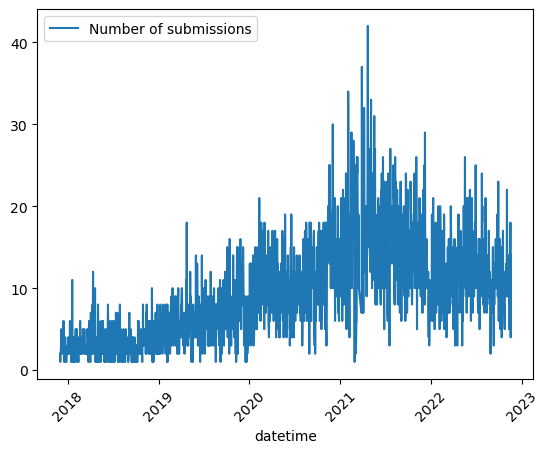

In [71]:
#Take a look at the distribution of submissions
submission_df.groupby(by=submission_df.datetime.dt.date).count().plot(y='id', rot=45, label='Number of submissions');

- ### The topic about Sustainability became even popular In the first and second quarters of 2021.
- ### In 2022, the sustainable fever decreases compared to 2021, but remains at a high level in the last five years. This indicates that people now value sustainability more than before and they may be more possible to pay for sustain.

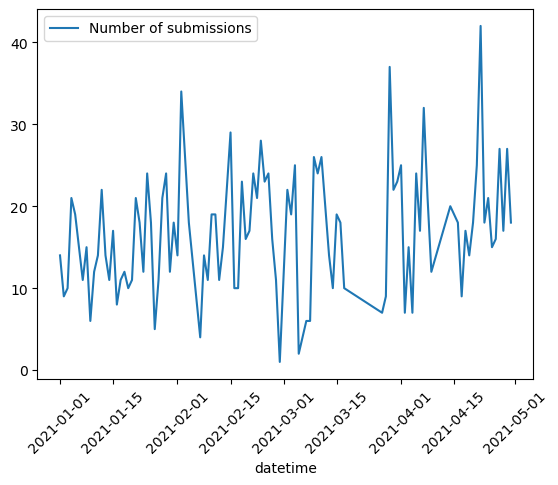

In [86]:
submission_top_2021 = submission_df[(submission_df["datetime"] > '2021-01-01') & (submission_df["datetime"] < '2021-05-01')]
submission_top_2021.groupby(by=submission_top_2021.datetime.dt.date).count().plot(y='id', rot=45, label='Number of submissions');

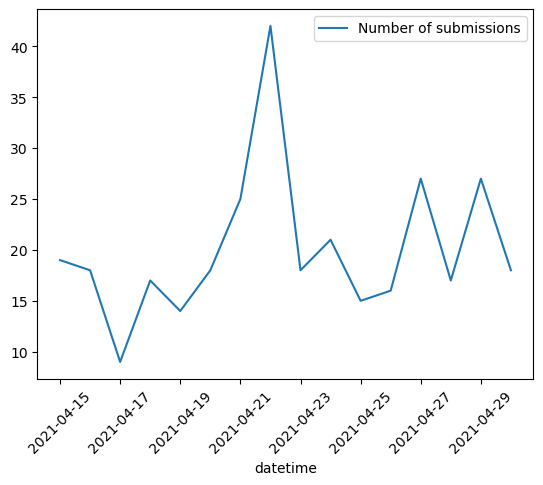

In [92]:
submission_top_2021_1 = submission_top_2021[(submission_top_2021["datetime"] > '2021-04-15') & (submission_top_2021["datetime"] < '2021-05-01')]
submission_top_2021_1.groupby(by=submission_top_2021_1.datetime.dt.date).count().plot(y='id', rot=45, label='Number of submissions');

- ### There was a submission peak in 2021-04-22

In [101]:
submission_top_2021_11 = submission_top_2021_1[(submission_top_2021_1["datetime"] >= '2021-04-22')&(submission_top_2021_1["datetime"] < '2021-04-23')]
submission_top_2021_11 = submission_top_2021_11.sort_values(by='datetime')

submission_top_2021_11

,id,author,over_18,domain,title,score,selftext,num_comments,num_crossposts,datetime
7748,mvy7pk,ethereumflow,False,link.medium.com,Carbon removal NFTs are the solution to energy...,1,,0,0,2021-04-22 01:39:33
7747,mvzqob,CEOmother_nature,False,i.redd.it,Happy Earth Day! Mother Nature is looking for ...,1,,0,0,2021-04-22 03:42:22
7746,mw0u6b,Newsjunkeefromlondon,False,cityam.com,MPs call for 'greenwashing' ban in financial s...,1,,0,0,2021-04-22 05:16:25
7745,mw1lxg,catrinadaimonlee,False,i.redd.it,For Earth Day 2021 :),1,,13,0,2021-04-22 06:15:32
7744,mw1rvf,nagaraju_raj,False,i.redd.it,For all kind people on here,1,,0,0,2021-04-22 06:27:10
7743,mw20xu,Emotional_Radio243,False,self.sustainability,"I NEED 200 RESPONSES TO GRADUATE, ONLY HAVE 47...",1,[removed],0,0,2021-04-22 06:45:22
7742,mw2m60,wapaat,False,youtu.be,Six Key Psychological Tricks They Use To Sell ...,1,,0,0,2021-04-22 07:25:23
7741,mw3gdn,MarkTotal-oil,False,self.sustainability,Happy EarthDay to everybody! And a big thanks ...,1,[removed],0,0,2021-04-22 08:17:24
7740,mw46ng,FaronSage,False,medium.com,Social Media Vs. Collective Consciousness: wha...,1,,2,0,2021-04-22 09:00:06
7739,mw4tqh,GetTheHumanifiedApp,False,self.sustainability,What's one thing people could do today to live...,1,We work with people who want to make a differe...,15,0,2021-04-22 09:32:40


- ### 0422 is the World Earth Day, so that people talk more about sustainability. Maybe we can make some market campaigns on the World Earth Day, as people care more about sustainability on this day.

In [108]:
submission_df.head()

,id,author,over_18,domain,url,title,score,selftext,num_comments,num_crossposts,datetime
16642,7gkx8i,nWR8j4Log80CexmPNv65,False,vimeo.com,https://vimeo.com/238445419,Blood Water: B.C.’s Dirty Salmon Farming Secret,1,,0,0,2017-11-30 03:27:36
16641,7goyqo,rachelmccart,False,nisbets.com.au,https://www.nisbets.com.au/food-waste,A Restaurant's Guide to reducing food waste,1,,0,0,2017-11-30 14:39:23
16640,7gz7o1,ghostofexredditor,False,indiegogo.com,https://www.indiegogo.com/projects/end-disposa...,What if every disposable package could connect...,1,,0,0,2017-12-01 19:00:21
16639,7hkc3s,[deleted],False,self.sustainability,https://www.reddit.com/r/sustainability/commen...,Any super heroes in the bunch that want to sta...,3,[deleted],6,0,2017-12-04 15:58:19
16638,7hlq15,vicksterric,False,eqyoga.co.uk,http://www.eqyoga.co.uk/single-post/2017/11/03...,My blog entry about things I have stopped doin...,1,,0,0,2017-12-04 19:14:16


In [304]:
#Take a look at the re-subreddits and the top frequency
import collections
import re

re_subreddit = re.compile(r'/r/([a-zA-Z0-9]+)/?')
valid_urls = filter(lambda url: url.startswith('https:') and '/user/' not in url and '/u/' not in url, submission_df[submission_df.domain == 'reddit.com'].url)

In [305]:
nums = " ".join(valid_urls)

a = re.search(re_subreddit, nums).group(1)
a

'climate'

- ### The most frequent subject related to sustainability is 'Climate'.
- ### This indicates people who care about sustainability pay attention to the climate most.
- ### So, if we want customers  to pay more for sustainability, we can shift their attention more on help protect the climate.

In [139]:
#Find the most frequent domains that apper in the submissions
domains = submission_df[(submission_df.domain != 'reddit.com') & (submission_df.domain != 'self.Sustainability')]
domains['domain'].head(10)

16642              vimeo.com
16641         nisbets.com.au
16640          indiegogo.com
16639    self.sustainability
16638           eqyoga.co.uk
16637            foxnews.com
16636    self.sustainability
16635      global.nature.org
16634            youtube.com
16633     washingtonpost.com
Name: domain, dtype: object

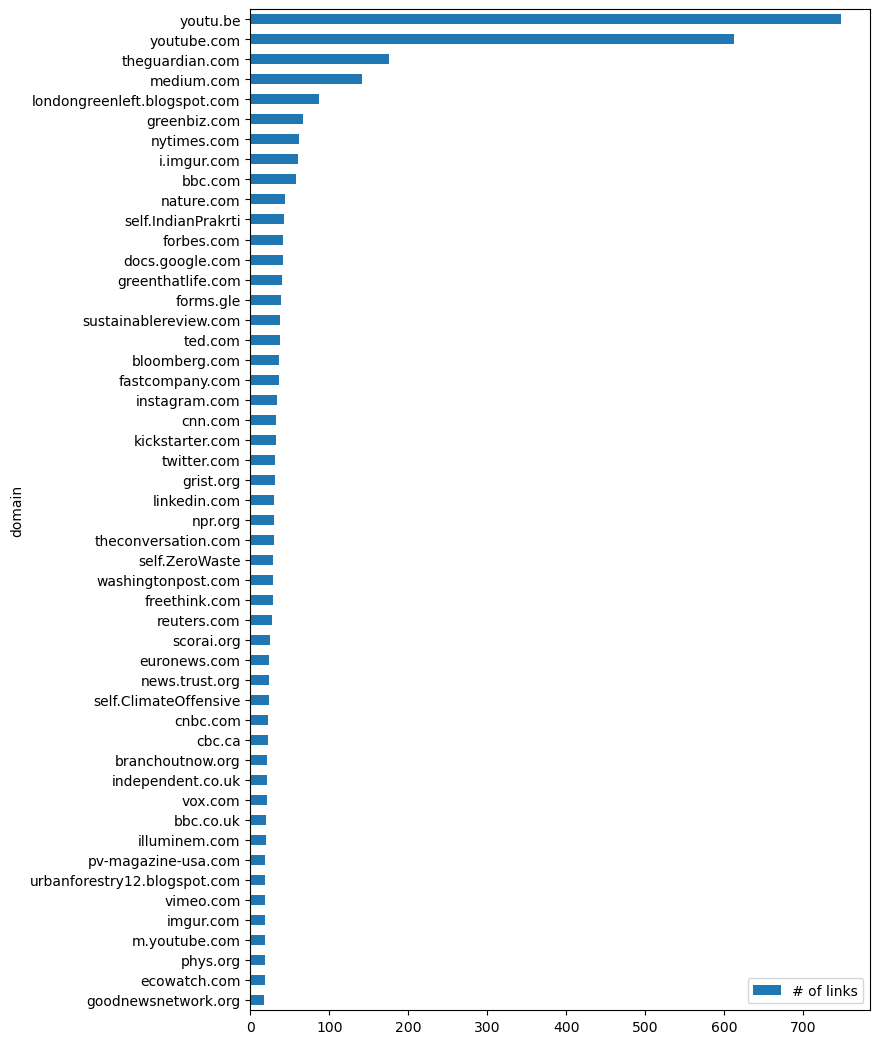

In [143]:
domains = domains[(domains.domain != 'self.sustainability')&(domains.domain != 'i.redd.it')&(domains.domain != 'v.redd.it')]
domains.groupby(by='domain').count()['id'].nlargest(50).sort_values(ascending=True).plot(kind='barh', x='domain', label='# of links', legend=True, figsize=(8,13));

- ### Youtube has been the most frequent domain appeared in the reddits about 'Sustainability' in recent 5 years, then is the theguardian.com and medium.com.
- ### Which means, people who care about sustainability and may pay more for sustainability also pay more attention to websites like Youtube, Theguardian and Medium. So, we may put more advertisements in these website in the near future.

In [309]:
#The correlation between ages and (score, number of comments and number of crossposts)
temp = submission_df
del temp['created_utc']
temp.corr()

,over_18,score,num_comments,num_crossposts
over_18,1.000000,-0.004966,0.005126,-0.001504
score,-0.004966,1.000000,0.202400,0.210981
num_comments,0.005126,0.202400,1.000000,0.089020
num_crossposts,-0.001504,0.210981,0.089020,1.000000


- ### People above 18 years old will have more population who care more about sustainability than people below 18.

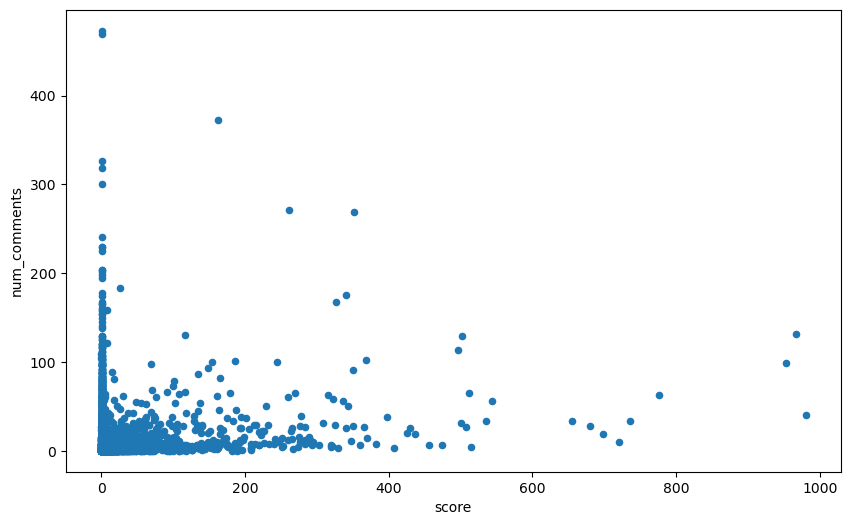

In [311]:
temp.plot(kind='scatter', x='score', y='num_comments', figsize=(10,6));

In [313]:
#Explore the submission with the highest score
temp[temp.score == temp.score.max()].values

array([['lcp6wa', 'KeithFromAccounting', False, 'self.sustainability',
        'https://www.reddit.com/r/sustainability/comments/lcp6wa/trying_to_live_more_sustainably_is_a_thankless/',
        'Trying to live more sustainably is a thankless task, so I just wanted to say: thank you all for trying to make the world a better place',
        980,
        'I spend so much time trying to reduce my waste and partake in climate activism, because I want to do my part to save the future for the next generations. And all I get from the people around me is snide comments and reminders that "what I\'m doing won\'t fix anything". It\'s frustrating, and I imagine many of you have faced the same thing, so let me just say:\n\nWhether it be composting, cutting out meat, driving an electric car, riding a bike everywhere, using reusable grocery bags, gardening, calling local representatives, engaging in mass protests, educating yourself on climate science, educating others, reducing flights, going childl

- ### The submission with the highest score is still about climate. Marine is part of our climate, People are no less concerned about ocean sustainability, so those who are already concerned about climate sustainability may be willing to pay for sustainable.

## Analyze Comments

- ### Comments data is extracted from November of 2020 to November of 2022. Because In these years, the submissions about sustain are more than ever in reddit

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

In [351]:
comments_df.head(10)

,id,author,created_utc,body,score,controversiality,total_awards_received
0,ix2bn7w,[deleted],1668920334,[removed],1,0.0,0
1,ix2a3v2,OokiiStaR,1668919421,"And if not, is it that water dissolving foam p...",1,0.0,0
2,ix28nrg,Yeetin_Boomer_Actual,1668918588,Like a box.,1,0.0,0
3,ix280zj,TSLAog,1668918222,"Wrong, a Proterra electric bus seats 40 max, ...",1,0.0,0
4,ix26ov7,TSLAog,1668917478,"I get that, but the manufacture emission shoul...",1,0.0,0
5,ix262vi,TSLAog,1668917142,This chart smells of massive inaccuracies. No...,1,0.0,0
6,ix257jj,RobertN64,1668916672,Awesome! Thanks!,1,0.0,0
7,ix257ff,Ok-Cartographer-3725,1668916670,That is interesting! So it sounds like you are...,1,0.0,0
8,ix255t3,nud2580,1668916645,I forwarded this to a college who works for Am...,1,0.0,0
9,ix24ifw,SeaMonkeyMating,1668916303,It says to recycle it like a box not paper.,1,0.0,0


In [342]:
comments_df['score'].describe()

count    72928.000000
mean         2.623999
std          9.008315
min        -89.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        916.000000
Name: score, dtype: float64

In [343]:
comments_df['controversiality'].describe()

count    34281.000000
mean         0.000817
std          0.028568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: controversiality, dtype: float64

In [344]:
comments_df['total_awards_received'].describe()

count    72928.000000
mean         0.001508
std          0.041868
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: total_awards_received, dtype: float64

In [353]:
#Clean the datasets: Remove Nulls
comments_df = comments_df[(comments_df['body'] != '[removed]') & (comments_df['body'] != '[deleted]')]

In [354]:
len(comments_df)

70450

In [355]:
import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.metrics import plot_roc_curve
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

In [356]:
comments_df['clean_body'] = pd.Series([clean_text(i) for i in tqdm(comments_df['body'])])

  0%|          | 0/70450 [00:00<?, ?it/s]

In [358]:
words = comments_df["clean_body"].values

In [359]:
ls = []

for i in words:
    ls.append(str(i))

In [360]:
ls[:5]

['like box',
 'wrong proterra electr bus seat  max also often time far fewer peopl aboard model seat differ time also buss run  even empti electr car aimless drive around wast energi tire wear also proterra bud use  watt per mile model use  watt per mile mean need bare minimum  peopl break even effici judg local buss lucki see peopl',
 'get manufactur emiss way electr car batteri typic kwh  time averag electr car plus everyth bigger tire wheel bodi seat glass etc',
 'chart smell massiv inaccuraci way electr bus x effici electr car bus batteri  time size massiv metal paint seat etc yet manufactur emiss x less car yea plus walk emiss calori food requir make walk compar bike easili roll requir less energi per mile thank walk yea chart garbag',
 'awesom thank']

(-0.5, 1599.5, 799.5, -0.5)

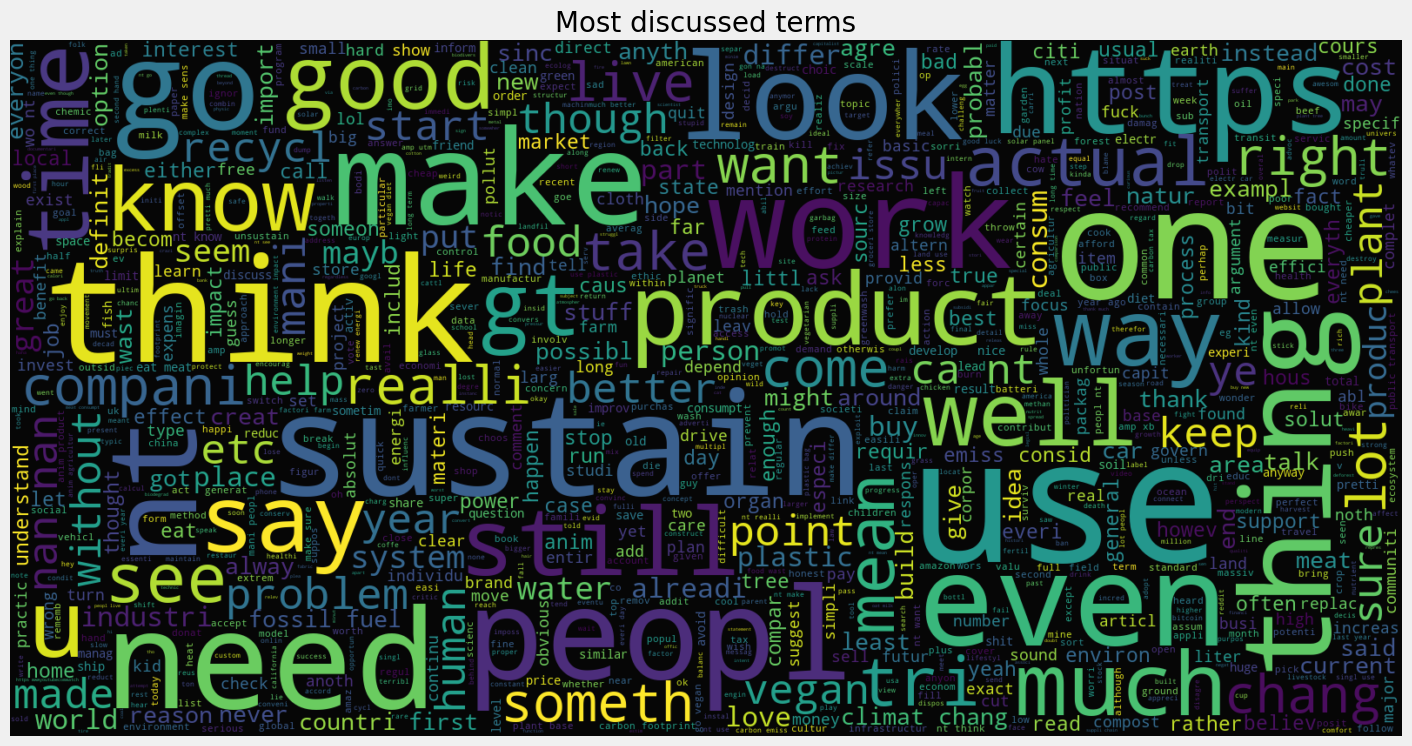

In [361]:
# The wordcloud of most discussed terms for 'Sustainability'
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

## Important words: Vegan, food, recycle, environment.

In [362]:
#Find the most popular comments
most_pop = comments_df.sort_values('score', ascending =False)[['body', 'score']].head(12)

most_pop['score1'] = most_pop['score']/1000

In [367]:
pd.set_option('display.max_colwidth', None)

most_pop.head(10)

,body,score,score1
41157,Imagine being bothered by someone drying their clothes in the sun on their own property.,916,0.916
54673,"If you really care about sustainability or environmental impact, then buy second-hand carbon steel and cast iron cookware. Even the best ""nonstick"" coatings will only last a few years of regular use before they're scratched up and flaking off in to your food, at which point you have to toss them and buy a new one. But properly seasoned carbon steel or cast iron are just as slick and will still be used by your grandchildren's grandchildren, if you take good care of them. Even if they're fucked up and rusty, all you need is some sandpaper and elbow grease and they're as good as new. Stainless is good too, especially for saucepans and soup pots. Look for enameled cast iron if you don't want to deal with seasoning your pans. An enameled cast iron dutch oven can cook 90% of everything you'll ever eat for the rest of your life.",404,0.404
44715,"You could use an unglazed clay water container for the purpose without the issues of plastic, it gives the plants a buffer against drought",361,0.361
41151,"I am so furious by that state of mind, like… “save the earth? Sorry I can’t do that because I am more important than literally everyone and everything else.” Absolutely ridiculous.",343,0.343
48030,...except that this is still a million times worse than filtered tap water.,285,0.285
41159,It's pretty simple. Being able to afford to run a dryer and replace clothes more often shows that that you have more money than poor people. It's just one more way to show your allegiance to the non-poor people in-group.,284,0.284
69615,Vote to hold corporations accountable for waste and emissions,275,0.275
52312,"Drink it and don't buy that brand again, and email their customer service to tell them you won't and why. If companies get enough of these emails, they might rethink their packaging strategy and eliminate unnecessary plastic.",239,0.239
41078,It is absurd that “right to dry” has to be a thing.,232,0.232
35735,"Unfortunately plastic free living isn't as easy as it needs to be, especially when it comes to food.\n\nNot everyone can afford/have the time to buy and hunt for the freshest and most organic foods. \n\nWe shouldn't be criticising people for spreading the word, the more voices we have the sooner change will happen.\n\nSmall changes by everyone makes a big difference.",231,0.231
